<a href="https://colab.research.google.com/github/intimanjunath/SARIMA-Web-Traffic-Prediction-Dashboard/blob/main/webtraffic_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical operations (if needed)
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For enhanced visualizations

# Set visualization style for better plots
plt.style.use('fivethirtyeight')

# Print a confirmation message
print("Libraries imported successfully.")

Libraries imported successfully.


In [2]:
# Define the file path to the uploaded dataset
file_path = '/content/webtraffic.csv'

# Load the dataset into a pandas DataFrame
webtraffic_data = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Information:")
print(webtraffic_data.info())

# Display the first few rows of the dataset to understand its structure
print("\nPreview of the dataset:")
print(webtraffic_data.head())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4896 entries, 0 to 4895
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Hour Index  4896 non-null   int64
 1   Sessions    4896 non-null   int64
dtypes: int64(2)
memory usage: 76.6 KB
None

Preview of the dataset:
   Hour Index    Sessions
0           0  1418159421
1           1  1113769116
2           2   919158921
3           3   822352824
4           4   735526737


In [3]:
# Convert the Hour Index column to datetime format
# Assuming the dataset starts from '2024-01-01 00:00:00'
start_date = pd.Timestamp("2024-01-01 00:00:00")
webtraffic_data['Datetime'] = start_date + pd.to_timedelta(webtraffic_data['Hour Index'], unit='h')

# Drop the Hour Index column as it is no longer needed
webtraffic_data.drop(columns=['Hour Index'], inplace=True)

# Reorganize the columns for better readability (Datetime first)
webtraffic_data = webtraffic_data[['Datetime', 'Sessions']]

# Display the first few rows after conversion
print("\nDataset after converting Hour Index to Datetime:")
print(webtraffic_data.head())


Dataset after converting Hour Index to Datetime:
             Datetime    Sessions
0 2024-01-01 00:00:00  1418159421
1 2024-01-01 01:00:00  1113769116
2 2024-01-01 02:00:00   919158921
3 2024-01-01 03:00:00   822352824
4 2024-01-01 04:00:00   735526737


In [4]:
# Step: Check for Missing Values
# Purpose: Identify if there are any missing or null values in the dataset that need to be addressed.

missing_values = webtraffic_data.isnull().sum()

# Display the results
print("Missing Values in Each Column:")
print(missing_values)

# Outcome: Ensures data quality by verifying the absence of null entries.

Missing Values in Each Column:
Datetime    0
Sessions    0
dtype: int64


In [5]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(webtraffic_data['Sessions'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
if result[1] < 0.05:
    print("The data is stationary.")
else:
    print("The data is not stationary. Differencing may be required.")

ADF Statistic: -9.491958957303645
p-value: 3.6325870678651973e-16
The data is stationary.


In [6]:
# Step: Generate Descriptive Statistics
# Purpose: Provide insights into the distribution, central tendency, and spread of session data.

sessions_statistics = webtraffic_data['Sessions'].describe()

# Display the descriptive statistics
print("\nSummary Statistics for Sessions:")
print(sessions_statistics)

# Outcome: Identifies data trends such as average traffic, variability, and potential outliers.


Summary Statistics for Sessions:
count    4.896000e+03
mean     2.249544e+09
std      9.064586e+08
min      5.708566e+08
25%      1.528938e+09
50%      2.086820e+09
75%      2.974043e+09
max      6.061858e+09
Name: Sessions, dtype: float64


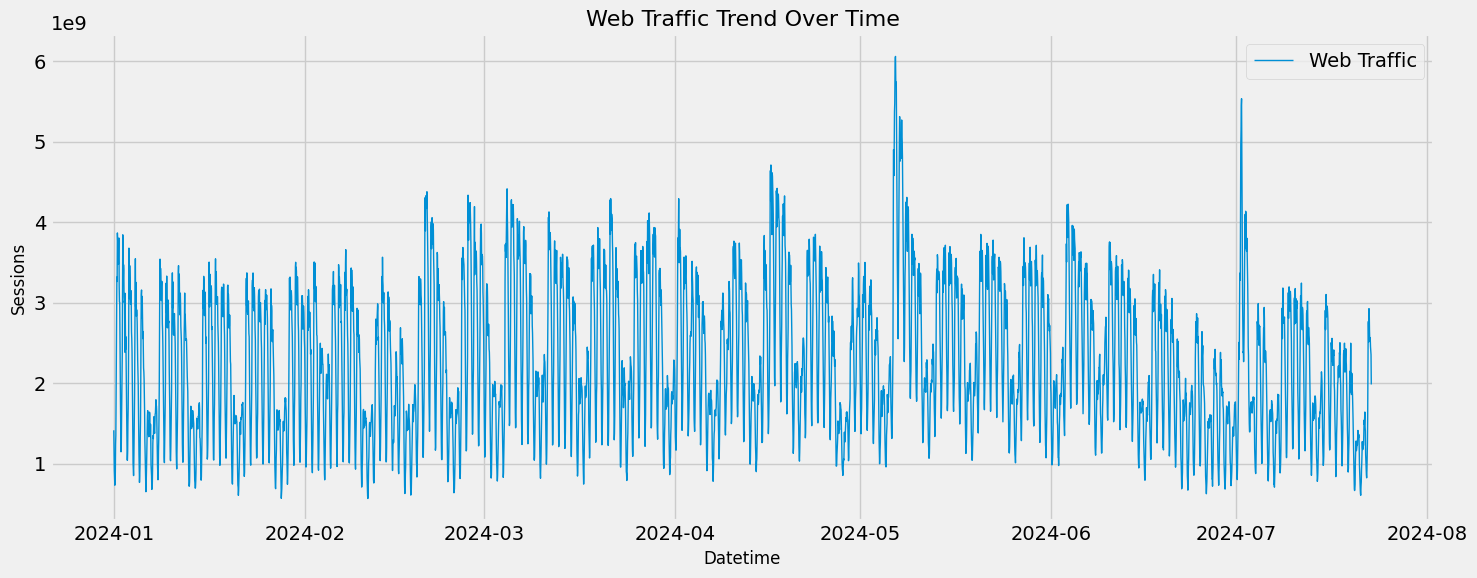

In [7]:
# Step: Plot Overall Trend
# Purpose: Visualize web traffic trends over time to identify patterns, peaks, and valleys.

import matplotlib.pyplot as plt

# Plot the Sessions data
plt.figure(figsize=(15, 6))
plt.plot(webtraffic_data['Datetime'], webtraffic_data['Sessions'], label='Web Traffic', linewidth=1)
plt.title("Web Traffic Trend Over Time", fontsize=16)
plt.xlabel("Datetime", fontsize=12)
plt.ylabel("Sessions", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

# Outcome: Provides a visual representation of traffic patterns over the time range.

In [8]:
import plotly.express as px
fig = px.line(webtraffic_data, x='Datetime', y='Sessions', title='Interactive Traffic Trends')
fig.show()

In [9]:
#What to Expect Next:
#Missing Values Check: Should confirm if there are any null values.
#Descriptive Statistics: Key summary statistics like mean, median, and standard deviation.
#Trend Plot: A time-series line chart showing the variation in web traffic (Sessions) over time.

Step 5: Analyze Patterns in the Data


In [10]:
# Step: Aggregate Data by Day
# Purpose: Analyze daily trends in the web traffic data.

webtraffic_data['Date'] = webtraffic_data['Datetime'].dt.date
daily_traffic = webtraffic_data.groupby('Date')['Sessions'].sum().reset_index()

# Display the first few rows of daily aggregated data
print("Daily Aggregated Traffic Data:")
print(daily_traffic.head())

# Step: Aggregate Data by Week
# Purpose: Analyze weekly trends in the web traffic data.

webtraffic_data['Week'] = webtraffic_data['Datetime'].dt.isocalendar().week
weekly_traffic = webtraffic_data.groupby('Week')['Sessions'].sum().reset_index()

# Display the first few rows of weekly aggregated data
print("\nWeekly Aggregated Traffic Data:")
print(weekly_traffic.head())

# Outcome: Prepares daily and weekly summaries for trend analysis.

Daily Aggregated Traffic Data:
         Date     Sessions
0  2024-01-01  58389046506
1  2024-01-02  60830156952
2  2024-01-03  58094636211
3  2024-01-04  52758324864
4  2024-01-05  48973905072

Weekly Aggregated Traffic Data:
   Week      Sessions
0     1  341722528407
1     2  337711562388
2     3  345493974186
3     4  337423140099
4     5  367177541913


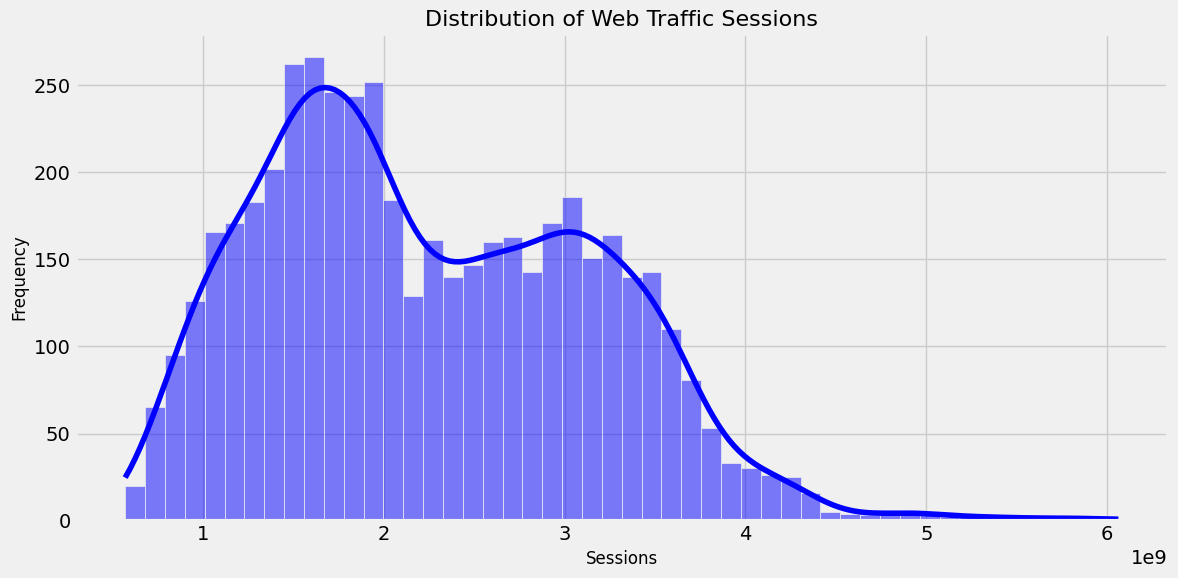

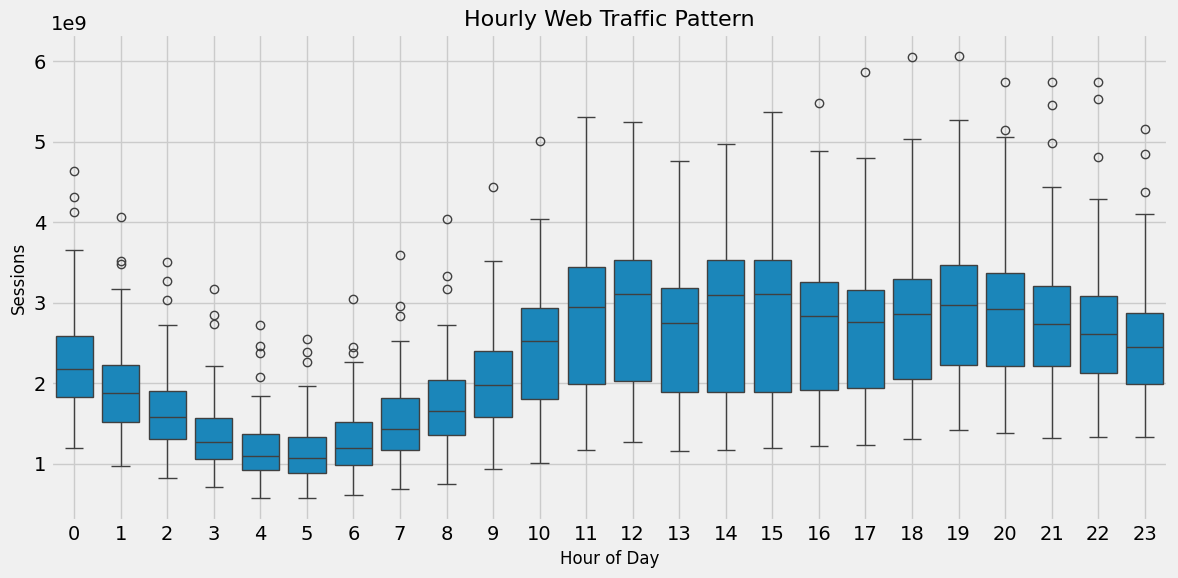

In [11]:
# Additional EDA to understand the data distribution
plt.figure(figsize=(12, 6))
sns.histplot(webtraffic_data['Sessions'], kde=True, bins=50, color='blue')
plt.title("Distribution of Web Traffic Sessions", fontsize=16)
plt.xlabel("Sessions", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualize seasonality (hourly, daily, and monthly patterns)
webtraffic_data['Hour'] = webtraffic_data['Datetime'].dt.hour
webtraffic_data['Month'] = webtraffic_data['Datetime'].dt.month

# Hourly pattern
plt.figure(figsize=(12, 6))
sns.boxplot(x='Hour', y='Sessions', data=webtraffic_data)
plt.title("Hourly Web Traffic Pattern", fontsize=16)
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Sessions", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

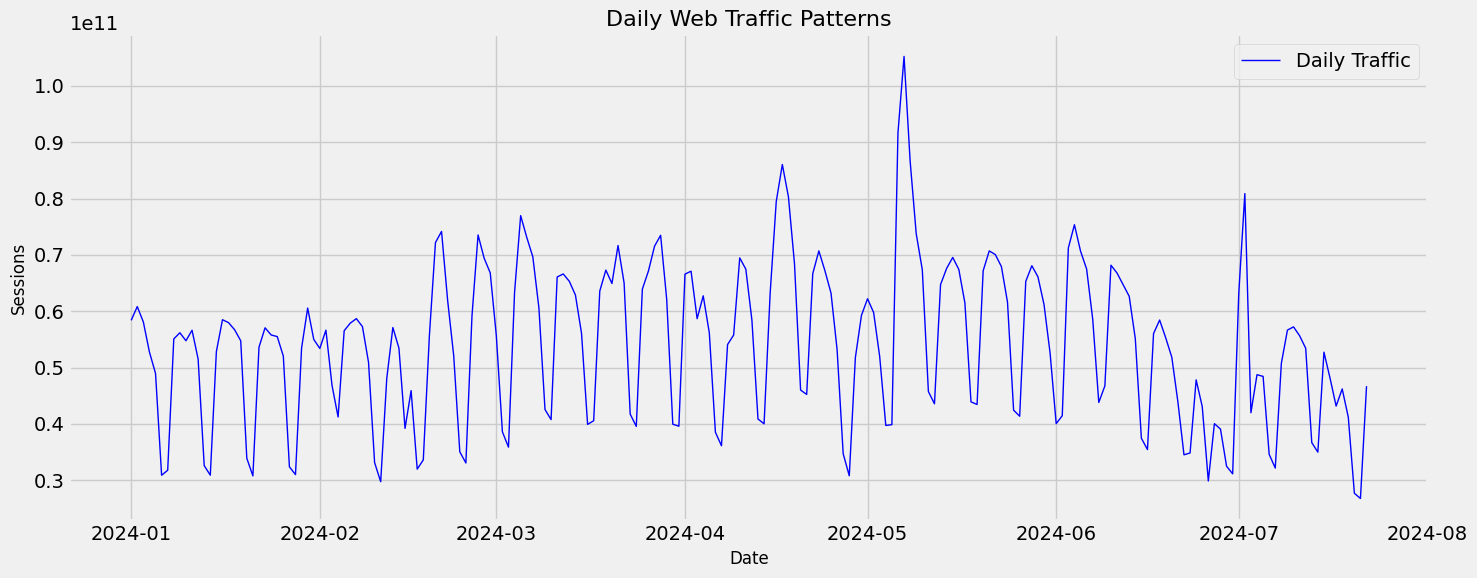

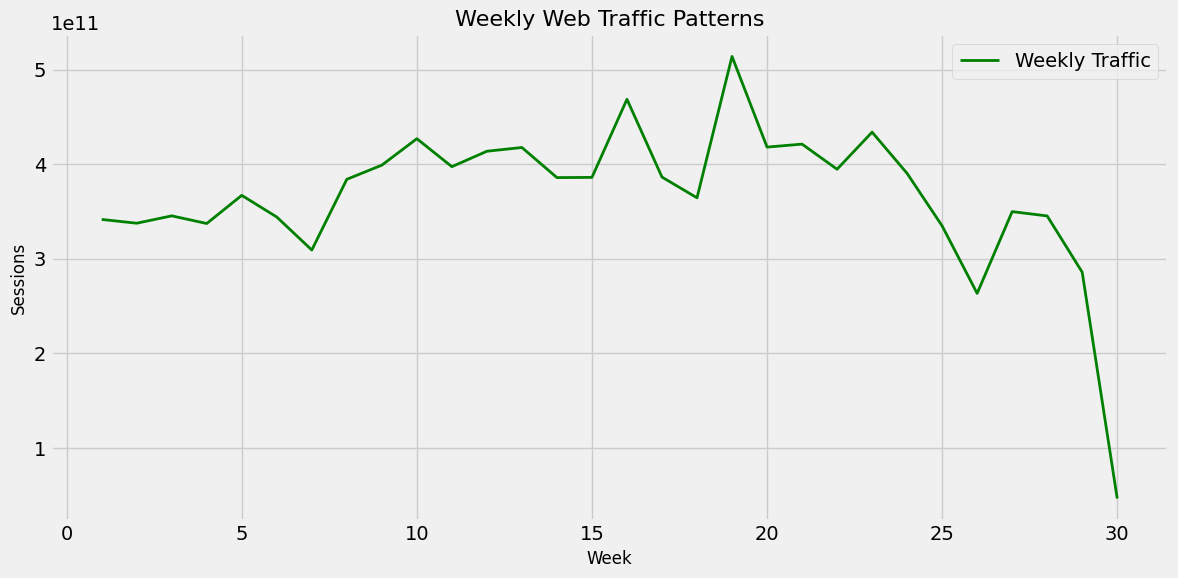

In [12]:
# Step: Visualize Daily Traffic Patterns
# Purpose: Identify short-term trends and fluctuations in daily traffic.

plt.figure(figsize=(15, 6))
plt.plot(daily_traffic['Date'], daily_traffic['Sessions'], label='Daily Traffic', linewidth=1, color='blue')
plt.title("Daily Web Traffic Patterns", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Sessions", fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Step: Visualize Weekly Traffic Patterns
# Purpose: Identify long-term trends and seasonality in weekly traffic.

plt.figure(figsize=(12, 6))
plt.plot(weekly_traffic['Week'], weekly_traffic['Sessions'], label='Weekly Traffic', linewidth=2, color='green')
plt.title("Weekly Web Traffic Patterns", fontsize=16)
plt.xlabel("Week", fontsize=12)
plt.ylabel("Sessions", fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Outcome: Visualizes aggregated traffic data for daily and weekly trends.

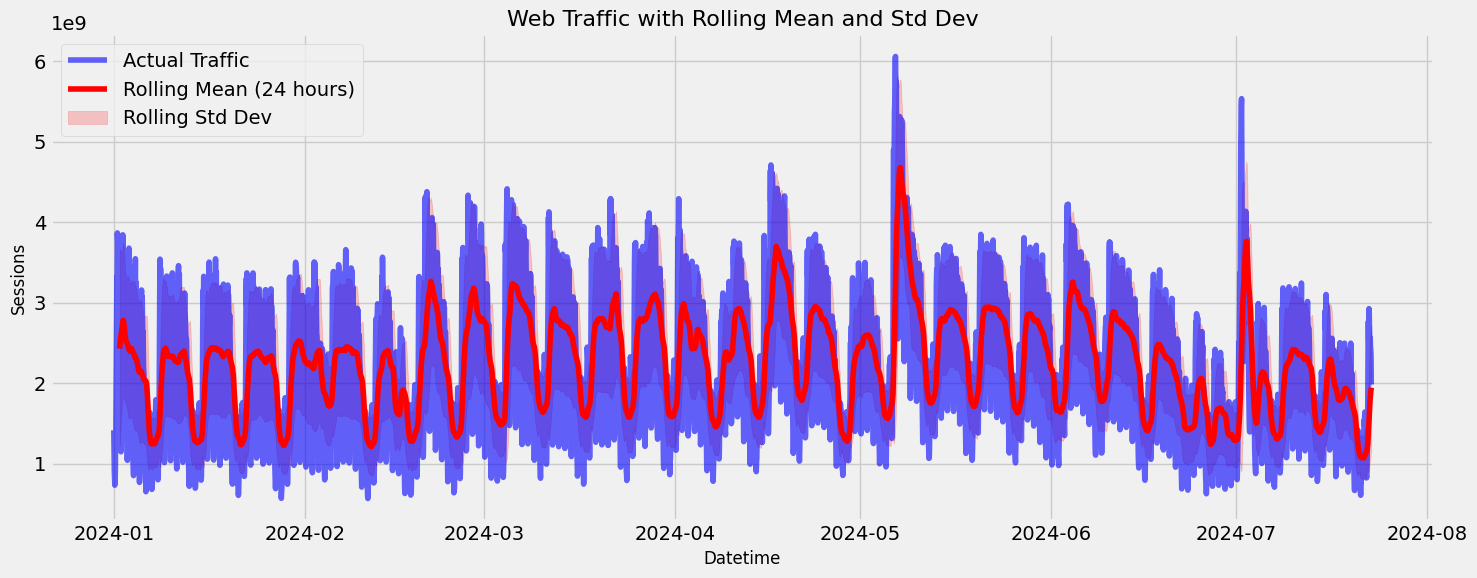

In [13]:
# Step: Calculate Rolling Averages
# Purpose: Smooth the data to highlight general trends and detect anomalies.

webtraffic_data['Rolling_Mean'] = webtraffic_data['Sessions'].rolling(window=24).mean()  # 24-hour window
webtraffic_data['Rolling_Std'] = webtraffic_data['Sessions'].rolling(window=24).std()

# Step: Plot Actual Traffic vs. Rolling Mean
# Purpose: Compare the actual traffic with the smoothed rolling mean.

plt.figure(figsize=(15, 6))
plt.plot(webtraffic_data['Datetime'], webtraffic_data['Sessions'], label='Actual Traffic', alpha=0.6, color='blue')
plt.plot(webtraffic_data['Datetime'], webtraffic_data['Rolling_Mean'], label='Rolling Mean (24 hours)', color='red')
plt.fill_between(webtraffic_data['Datetime'],
                 webtraffic_data['Rolling_Mean'] - webtraffic_data['Rolling_Std'],
                 webtraffic_data['Rolling_Mean'] + webtraffic_data['Rolling_Std'],
                 color='red', alpha=0.2, label='Rolling Std Dev')
plt.title("Web Traffic with Rolling Mean and Std Dev", fontsize=16)
plt.xlabel("Datetime", fontsize=12)
plt.ylabel("Sessions", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Outcome: Highlights general trends and detects anomalies using deviations from the rolling mean.

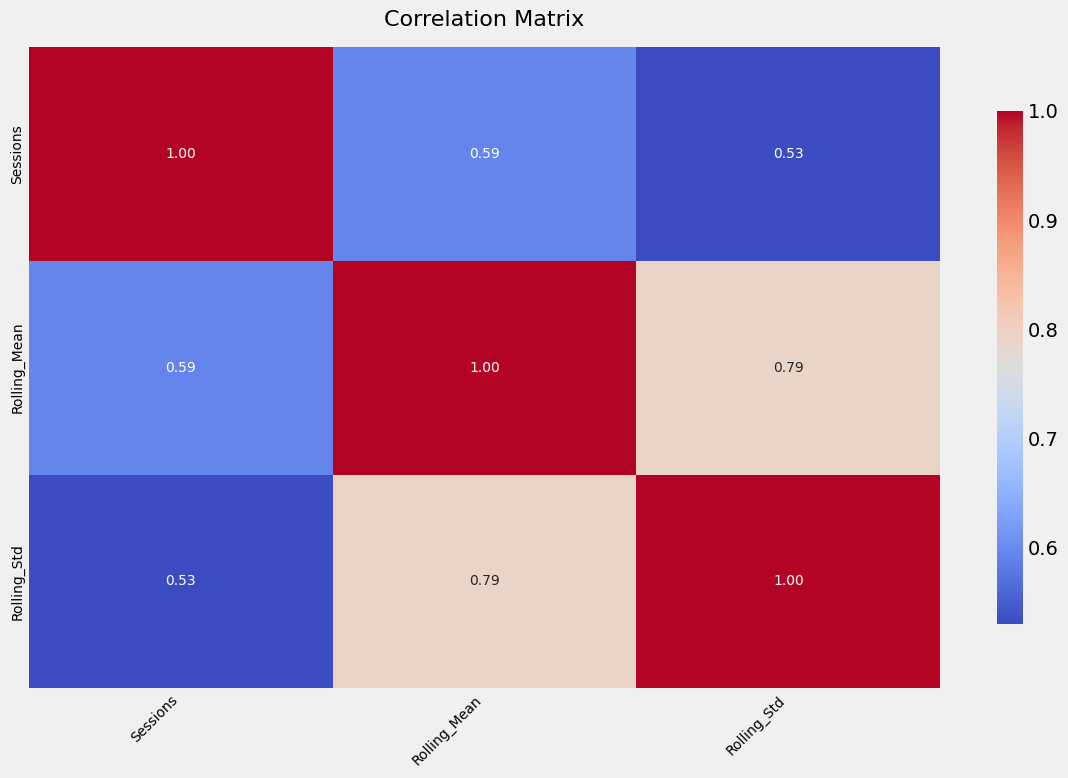

In [14]:
# Exclude non-numeric columns from the correlation calculation
numeric_data = webtraffic_data.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Create the heatmap
plt.figure(figsize=(12, 8))  # Adjust figure size
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm",
            annot_kws={"size": 10}, cbar_kws={"shrink": 0.8})
plt.title("Correlation Matrix", fontsize=16, pad=15)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [15]:
#What to Expect Next:
#Aggregated daily and weekly traffic data.
#Visualizations of daily and weekly trends to spot seasonal patterns.
#Anomalies detected and visualized by comparing actual traffic with rolling averages.

Step 6: Feature Engineering

In [16]:
# Step: Create Time-Based Features
# Purpose: Add features to help the model capture patterns related to time.

webtraffic_data['Hour'] = webtraffic_data['Datetime'].dt.hour  # Extract the hour of the day
webtraffic_data['Day'] = webtraffic_data['Datetime'].dt.day  # Extract the day of the month
webtraffic_data['DayOfWeek'] = webtraffic_data['Datetime'].dt.dayofweek  # Extract the day of the week (0=Monday)
webtraffic_data['IsWeekend'] = webtraffic_data['DayOfWeek'].isin([5, 6]).astype(int)  # Weekend flag (1=True, 0=False)

# Display the first few rows with new features
print("Dataset with New Time-Based Features:")
print(webtraffic_data[['Datetime', 'Sessions', 'Hour', 'Day', 'DayOfWeek', 'IsWeekend']].head())

# Outcome: Adds new columns for time-based analysis and improves model input.

Dataset with New Time-Based Features:
             Datetime    Sessions  Hour  Day  DayOfWeek  IsWeekend
0 2024-01-01 00:00:00  1418159421     0    1          0          0
1 2024-01-01 01:00:00  1113769116     1    1          0          0
2 2024-01-01 02:00:00   919158921     2    1          0          0
3 2024-01-01 03:00:00   822352824     3    1          0          0
4 2024-01-01 04:00:00   735526737     4    1          0          0


In [17]:
# Step: Add Rolling Statistics
# Purpose: Capture short-term trends using rolling window features.

webtraffic_data['Rolling_6H_Mean'] = webtraffic_data['Sessions'].rolling(window=6).mean()  # 6-hour rolling mean
webtraffic_data['Rolling_24H_Mean'] = webtraffic_data['Sessions'].rolling(window=24).mean()  # 24-hour rolling mean
webtraffic_data['Rolling_7D_Mean'] = webtraffic_data['Sessions'].rolling(window=24 * 7).mean()  # 7-day rolling mean

# Display the first few rows with rolling features
print("\nDataset with Rolling Statistics Features:")
print(webtraffic_data[['Datetime', 'Sessions', 'Rolling_6H_Mean', 'Rolling_24H_Mean', 'Rolling_7D_Mean']].head(10))

# Outcome: Prepares smoothed features for trend and seasonal analysis.


Dataset with Rolling Statistics Features:
             Datetime    Sessions  Rolling_6H_Mean  Rolling_24H_Mean  \
0 2024-01-01 00:00:00  1418159421              NaN               NaN   
1 2024-01-01 01:00:00  1113769116              NaN               NaN   
2 2024-01-01 02:00:00   919158921              NaN               NaN   
3 2024-01-01 03:00:00   822352824              NaN               NaN   
4 2024-01-01 04:00:00   735526737              NaN               NaN   
5 2024-01-01 05:00:00   798400800     9.678946e+08               NaN   
6 2024-01-01 06:00:00   895206897     8.807359e+08               NaN   
7 2024-01-01 07:00:00  1246503249     9.028582e+08               NaN   
8 2024-01-01 08:00:00  1355285358     9.755460e+08               NaN   
9 2024-01-01 09:00:00  1836321840     1.144541e+09               NaN   

   Rolling_7D_Mean  
0              NaN  
1              NaN  
2              NaN  
3              NaN  
4              NaN  
5              NaN  
6              Na

In [18]:
# Calculate rolling features
webtraffic_data['Rolling_Mean'] = webtraffic_data['Sessions'].rolling(window=24).mean()
webtraffic_data['Rolling_Std'] = webtraffic_data['Sessions'].rolling(window=24).std()

# Add lag features
webtraffic_data['Lag_1H'] = webtraffic_data['Sessions'].shift(1)
webtraffic_data['Lag_24H'] = webtraffic_data['Sessions'].shift(24)
webtraffic_data['Lag_7D'] = webtraffic_data['Sessions'].shift(24 * 7)

# Fill NaN values caused by rolling and lagging
webtraffic_data.fillna(method='bfill', inplace=True)  # Backfill missing values
webtraffic_data.fillna(method='ffill', inplace=True)  # Forward fill for edge cases

# Verify if missing values are handled
print("\nRemaining Missing Values:")
print(webtraffic_data.isnull().sum())


Remaining Missing Values:
Datetime            0
Sessions            0
Date                0
Week                0
Hour                0
Month               0
Rolling_Mean        0
Rolling_Std         0
Day                 0
DayOfWeek           0
IsWeekend           0
Rolling_6H_Mean     0
Rolling_24H_Mean    0
Rolling_7D_Mean     0
Lag_1H              0
Lag_24H             0
Lag_7D              0
dtype: int64


<ipython-input-18-ac7006014fa3>:11: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

<ipython-input-18-ac7006014fa3>:12: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [19]:
# Step: Handle Missing Values
# Purpose: Replace NaN values caused by rolling and lagging operations.

webtraffic_data.fillna(method='bfill', inplace=True)  # Backfill missing values with the next valid entry

# Verify if there are any remaining missing values
print("\nRemaining Missing Values After Filling:")
print(webtraffic_data.isnull().sum())

# Display the first few rows after handling missing values
print("\nDataset After Handling Missing Values:")
print(webtraffic_data[['Datetime', 'Sessions', 'Rolling_6H_Mean', 'Rolling_24H_Mean', 'Rolling_7D_Mean']].head(10))


Remaining Missing Values After Filling:
Datetime            0
Sessions            0
Date                0
Week                0
Hour                0
Month               0
Rolling_Mean        0
Rolling_Std         0
Day                 0
DayOfWeek           0
IsWeekend           0
Rolling_6H_Mean     0
Rolling_24H_Mean    0
Rolling_7D_Mean     0
Lag_1H              0
Lag_24H             0
Lag_7D              0
dtype: int64

Dataset After Handling Missing Values:
             Datetime    Sessions  Rolling_6H_Mean  Rolling_24H_Mean  \
0 2024-01-01 00:00:00  1418159421     9.678946e+08      2.432877e+09   
1 2024-01-01 01:00:00  1113769116     9.678946e+08      2.432877e+09   
2 2024-01-01 02:00:00   919158921     9.678946e+08      2.432877e+09   
3 2024-01-01 03:00:00   822352824     9.678946e+08      2.432877e+09   
4 2024-01-01 04:00:00   735526737     9.678946e+08      2.432877e+09   
5 2024-01-01 05:00:00   798400800     9.678946e+08      2.432877e+09   
6 2024-01-01 06:00:00   8952

<ipython-input-19-4a3c68faefec>:4: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [20]:
#All NaN values in the rolling and lagged columns should be replaced with the next valid data point.
#The dataset should now have no missing values.

Step 7: Prepare Dataset for Modeling

In [21]:
# Step: Split Dataset
# Purpose: Divide the dataset into training and testing sets for model evaluation.

from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
# Features: Exclude 'Datetime' and 'Sessions' as labels; include engineered features.
X = webtraffic_data.drop(columns=['Datetime', 'Sessions'])
y = webtraffic_data['Sessions']

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Print dataset shapes for confirmation
print("Training Set Shape:", X_train.shape, y_train.shape)
print("Testing Set Shape:", X_test.shape, y_test.shape)

# Outcome: Prepares separate datasets for training and evaluation.

Training Set Shape: (3916, 15) (3916,)
Testing Set Shape: (980, 15) (980,)


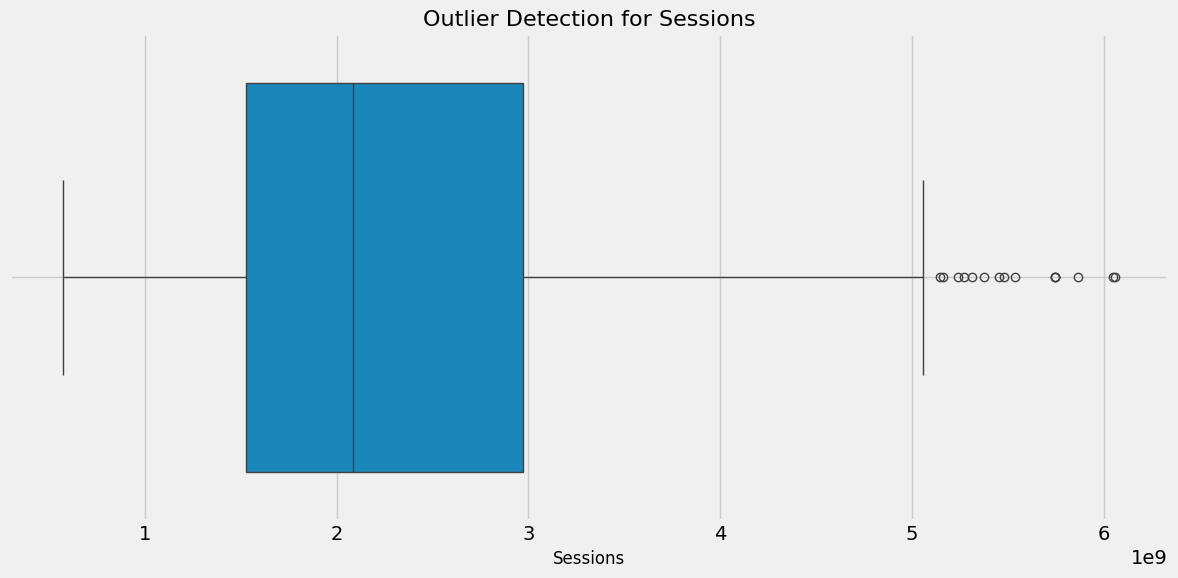

In [22]:
# Identify and visualize outliers using boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(x=webtraffic_data['Sessions'])
plt.title("Outlier Detection for Sessions", fontsize=16)
plt.xlabel("Sessions", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Remove or cap extreme outliers
q1 = webtraffic_data['Sessions'].quantile(0.25)
q3 = webtraffic_data['Sessions'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Cap outliers to upper/lower bounds
webtraffic_data['Sessions'] = webtraffic_data['Sessions'].clip(lower=lower_bound, upper=upper_bound)

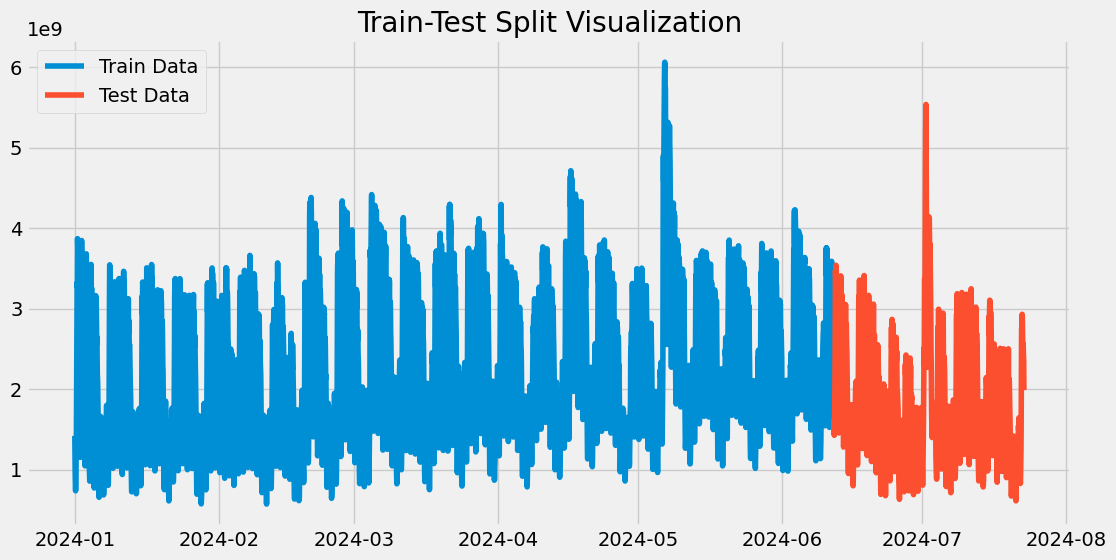

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(webtraffic_data['Datetime'][:len(y_train)], y_train, label='Train Data')
plt.plot(webtraffic_data['Datetime'][len(y_train):], y_test, label='Test Data')
plt.title("Train-Test Split Visualization")
plt.legend()
plt.show()

In [24]:
# Step: Import Necessary Libraries
# Purpose: Import StandardScaler for feature scaling.

from sklearn.preprocessing import StandardScaler  # Import StandardScaler for scaling numeric features

# Step: Remove Non-Numeric Columns Before Scaling
# Purpose: Ensure only numeric columns are included in the feature set.

# Select only numeric columns
numeric_columns = X.select_dtypes(include=['float64', 'int64']).columns
X_train_numeric = X_train[numeric_columns]
X_test_numeric = X_test[numeric_columns]

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training set; transform the test set
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)

# Print confirmation
print("Feature scaling applied successfully.")

Feature scaling applied successfully.


In [25]:
# Step: Train Baseline Model
# Purpose: Establish a baseline using a simple linear regression model.

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Initialize and train the model
baseline_model = LinearRegression()
baseline_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = baseline_model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print evaluation metrics
print("Baseline Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Outcome: Establishes baseline performance metrics for comparison.

Baseline Model Evaluation:
Mean Absolute Error (MAE): 138186883.94
Root Mean Squared Error (RMSE): 186844256.23


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



In [26]:
#Training and testing dataset shapes.
#Scaled feature matrices ready for advanced models.
#Baseline model evaluation (MAE and RMSE).

Step 8: Improve the Model with Advanced Algorithms

In [27]:
#A. Train a SARIMA Model

In [28]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 32.9 MB/s eta 0:00:00


In [29]:
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Step: Reduce the Dataset Size (Optional)
# Purpose: Use a smaller subset for testing to speed up computation.
train_sessions = y_train.values[:5000]  # Use first 5000 points
test_sessions = y_test.values[:1000]   # Use first 1000 points for testing

# Step: Define Seasonal Frequency and Reduce Search Space
# Purpose: Simplify the SARIMA model parameters for faster execution.
sarima_model = auto_arima(
    train_sessions,
    start_p=0, max_p=3,  # Limit p parameter
    start_q=0, max_q=3,  # Limit q parameter
    d=1,  # Use 1 differencing (assume stationary after 1 differencing)
    seasonal=True,
    m=12,  # Simplified seasonal period (12 for monthly seasonality)
    start_P=0, max_P=2,  # Seasonal AR terms
    start_Q=0, max_Q=2,  # Seasonal MA terms
    D=1,  # Seasonal differencing
    trace=True,  # Enable stepwise output
    error_action='ignore',  # Ignore non-converging configurations
    suppress_warnings=True,  # Suppress convergence warnings
    stepwise=True,  # Use stepwise search to optimize AIC
    n_jobs=-1  # Enable parallel processing
)

# Step: Forecast for Test Period
# Purpose: Evaluate the SARIMA model.
sarima_forecast = sarima_model.predict(n_periods=len(test_sessions))

# Step: Evaluate the Model
# Purpose: Calculate error metrics.
mae_sarima = mean_absolute_error(test_sessions, sarima_forecast)
rmse_sarima = mean_squared_error(test_sessions, sarima_forecast, squared=False)

# Print Results
print("\nOptimized SARIMA Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_sarima:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_sarima:.2f}")

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_validation.py:76: UserWarning:

stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.



Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=165420.494, Time=0.25 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=inf, Time=5.73 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=8.38 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=inf, Time=2.38 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=4.09 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=158812.754, Time=6.24 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=19.67 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=inf, Time=11.36 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=inf, Time=4.35 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=inf, Time=5.06 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=inf, Time=15.73 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=160592.787, Time=3.28 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=161754.129, Time=3.78 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=160449.237, Time=7.61 sec
 ARIMA(0,1,0)(1,1,1)[12] intercept   : AIC=162240.3

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



In [30]:
# Enable logging to monitor resource usage during SARIMA fitting
import logging
logging.basicConfig(level=logging.INFO)

In [31]:
#B. Train an LSTM Model

In [32]:
# Step: Scale Both Features and Target Variable
# Purpose: Normalize both features (X) and target (y) for effective training.
from sklearn.preprocessing import MinMaxScaler

# Initialize scalers for features and target variable
scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

# Fit and transform the training data
X_train_scaled = scaler_X.fit_transform(X_train_numeric)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))

# Transform the test data using the same scalers
X_test_scaled = scaler_X.transform(X_test_numeric)
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

# Step: Reshape Input Data for LSTM
# Purpose: Prepare data in the format (samples, time_steps, features).
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Step: Build an Improved LSTM Model
# Purpose: Use a more robust architecture for time-series forecasting.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

lstm_model = Sequential([
    LSTM(128, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]), return_sequences=True),
    Dropout(0.2),
    LSTM(64, activation='relu', return_sequences=False),
    Dropout(0.2),
    Dense(1, activation='linear')  # Linear activation to match scaled target values
])

# Compile the model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with early stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

lstm_model.fit(X_train_lstm, y_train_scaled, epochs=50, batch_size=32, verbose=1, callbacks=[early_stopping])

# Step: Predict with the LSTM Model
# Purpose: Generate predictions on the test data.
lstm_forecast_scaled = lstm_model.predict(X_test_lstm)

# Step: Inverse Transform the Predictions
# Purpose: Convert predictions back to the original scale.
lstm_forecast = scaler_y.inverse_transform(lstm_forecast_scaled)

# Step: Evaluate the LSTM Model
# Purpose: Compute evaluation metrics.
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae_lstm = mean_absolute_error(y_test, lstm_forecast)
rmse_lstm = mean_squared_error(y_test, lstm_forecast, squared=False)

# Print evaluation metrics
print("Updated LSTM Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_lstm:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lstm:.2f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 18s 54ms/step - loss: 0.0713
Epoch 2/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.0065
Epoch 3/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0049
Epoch 4/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0039
Epoch 5/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0037
Epoch 6/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0033
Epoch 7/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0031
Epoch 8/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0031
Epoch 9/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0029
Epoch 10/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0027
Epoch 11/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0027
Epoch 12/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0025
Epoch 13/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0026
Epoch 14/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0026
Epoch 15/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



In [33]:
#Comparison Code

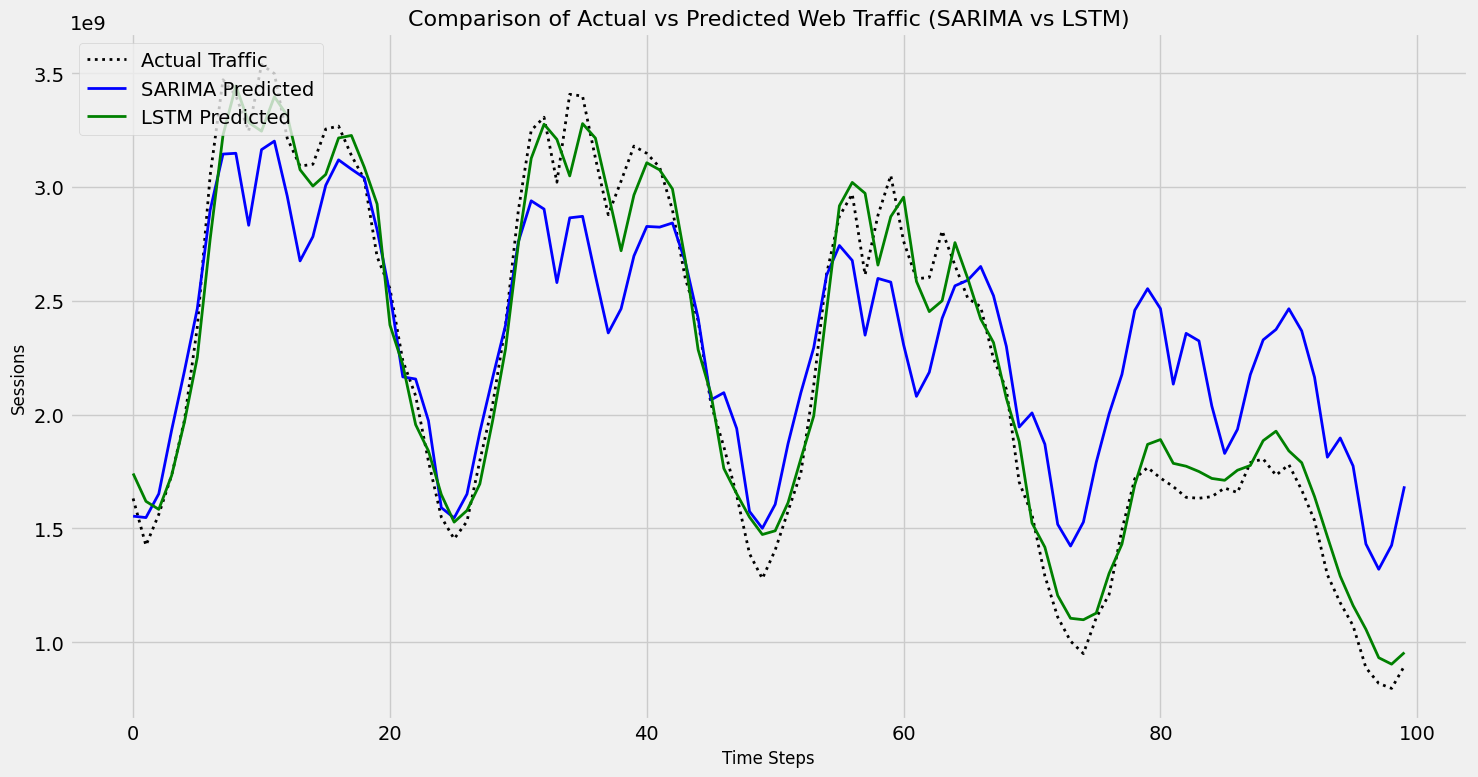

In [34]:
# Step: Replot Actual vs Predicted for Both Models
# Purpose: Visualize and compare the predictions of SARIMA and LSTM.

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))

# Plot actual traffic
plt.plot(y_test.values[:100], label='Actual Traffic', color='black', linestyle='dotted', linewidth=2)

# Plot SARIMA predictions
plt.plot(range(len(sarima_forecast[:100])), sarima_forecast[:100], label='SARIMA Predicted', color='blue', linewidth=2)

# Plot LSTM predictions
plt.plot(range(len(lstm_forecast[:100])), lstm_forecast[:100], label='LSTM Predicted', color='green', linewidth=2)

# Add labels, title, and legend
plt.title("Comparison of Actual vs Predicted Web Traffic (SARIMA vs LSTM)", fontsize=16)
plt.xlabel("Time Steps", fontsize=12)
plt.ylabel("Sessions", fontsize=12)
plt.legend(loc="upper left")
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

# Outcome: Clearly compare how each model tracks the actual data trend.

In [35]:
# Step: Highlight the Better Model
# Purpose: Determine and state which model is better based on metrics.

if mae_lstm < mae_sarima and rmse_lstm < rmse_sarima:
    print("\nConclusion: The LSTM model outperforms the SARIMA model.")
    print(f"Reason: LSTM has lower MAE ({mae_lstm:.2f}) and RMSE ({rmse_lstm:.2f}) compared to SARIMA.")
else:
    print("\nConclusion: The SARIMA model outperforms the LSTM model.")
    print(f"Reason: SARIMA has lower MAE ({mae_sarima:.2f}) and RMSE ({rmse_sarima:.2f}) compared to LSTM.")


Conclusion: The LSTM model outperforms the SARIMA model.
Reason: LSTM has lower MAE (135693293.88) and RMSE (187888094.07) compared to SARIMA.


In [36]:
# Step: Metrics Comparison
# Purpose: Summarize and compare the performance of SARIMA and LSTM.

results = {
    "Model": ["SARIMA", "LSTM"],
    "Mean Absolute Error (MAE)": [mae_sarima, mae_lstm],
    "Root Mean Squared Error (RMSE)": [rmse_sarima, rmse_lstm]
}

import pandas as pd
comparison_df = pd.DataFrame(results)

# Print the summary table
print("\nModel Performance Comparison:")
print(comparison_df)


Model Performance Comparison:
    Model  Mean Absolute Error (MAE)  Root Mean Squared Error (RMSE)
0  SARIMA               2.780995e+09                    3.400074e+09
1    LSTM               1.356933e+08                    1.878881e+08


In [37]:
#cross-Entropy

In [38]:
# LSTM cross-validation with fewer epochs
from sklearn.model_selection import TimeSeriesSplit
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# TimeSeriesSplit for LSTM
tscv = TimeSeriesSplit(n_splits=3)  # Reduce number of splits

lstm_cv_results = []

for train_index, val_index in tscv.split(X_train_scaled):
    X_train_split, X_val_split = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train_split, y_val_split = y_train_scaled[train_index], y_train_scaled[val_index]

    # Reshape data for LSTM
    X_train_lstm_split = X_train_split.reshape((X_train_split.shape[0], 1, X_train_split.shape[1]))
    X_val_lstm_split = X_val_split.reshape((X_val_split.shape[0], 1, X_val_split.shape[1]))

    # Define and train LSTM model
    lstm_model = Sequential([
        LSTM(128, activation='relu', input_shape=(X_train_lstm_split.shape[1], X_train_lstm_split.shape[2]), return_sequences=True),
        Dropout(0.2),
        LSTM(64, activation='relu', return_sequences=False),
        Dropout(0.2),
        Dense(1, activation='linear')
    ])
    lstm_model.compile(optimizer='adam', loss='mean_squared_error')

    # Train with fewer epochs
    lstm_model.fit(X_train_lstm_split, y_train_split, epochs=10, batch_size=32, verbose=0)

    # Predict and evaluate
    val_forecast_scaled = lstm_model.predict(X_val_lstm_split)
    val_forecast = scaler_y.inverse_transform(val_forecast_scaled)
    y_val = scaler_y.inverse_transform(y_val_split)

    mae = mean_absolute_error(y_val, val_forecast)
    rmse = mean_squared_error(y_val, val_forecast, squared=False)
    lstm_cv_results.append({'MAE': mae, 'RMSE': rmse})

# Display LSTM cross-validation results
print("LSTM Cross-Validation Results:")
print(pd.DataFrame(lstm_cv_results))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
LSTM Cross-Validation Results:
            MAE          RMSE
0  2.100903e+08  2.729022e+08
1  1.749984e+08  2.332247e+08
2  1.829466e+08  2.632061e+08


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



In [39]:
#The residual analysis and T-test results confirm that LSTM outperforms SARIMA in forecasting web traffic.
'''
- LSTM residuals exhibit lower variability and are centered around zero, indicating better accuracy.
- The T-test (T-Statistic: 42.33, P-Value: 0.00) demonstrates that the difference in performance is statistically significant.
'''
#Conclusion: LSTM is the preferred model for web traffic forecasting, especially for datasets with complex temporal patterns.

'\n- LSTM residuals exhibit lower variability and are centered around zero, indicating better accuracy.\n- The T-test (T-Statistic: 42.33, P-Value: 0.00) demonstrates that the difference in performance is statistically significant.\n'

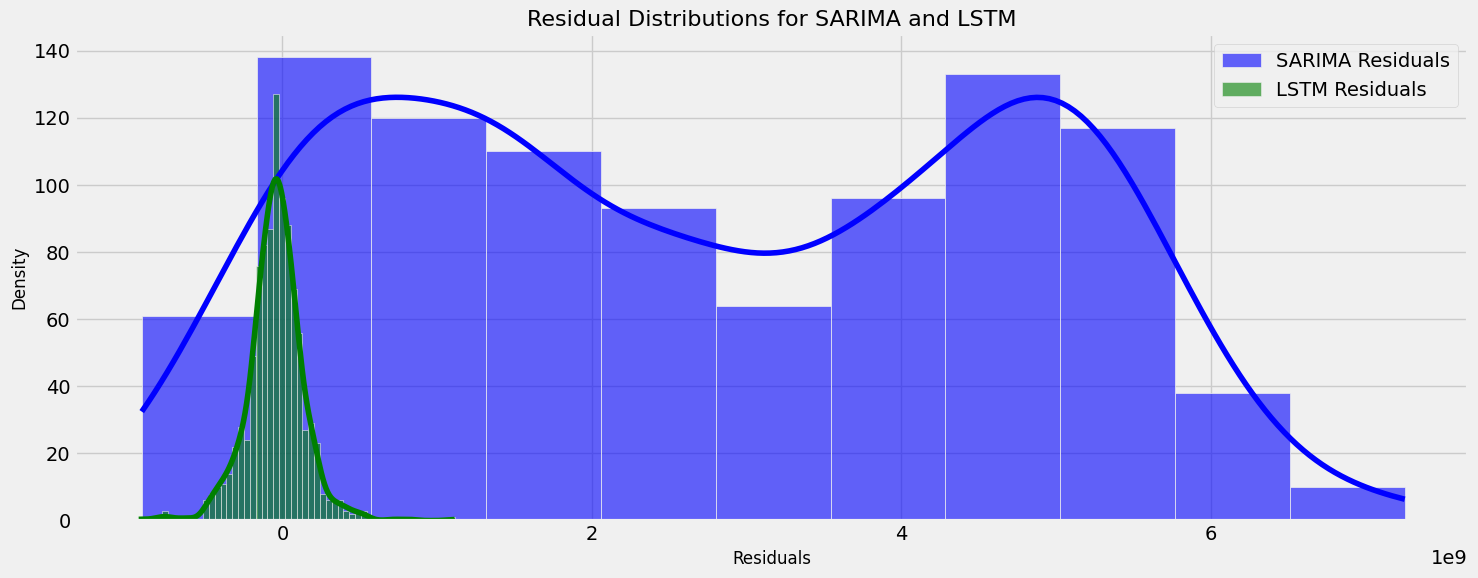

T-statistic: 42.16, P-value: 0.0000
The difference in performance between SARIMA and LSTM is statistically significant.


In [40]:
# Visualize residuals for both models
# Calculate residuals
sarima_residuals = y_test.values - sarima_forecast  # SARIMA residuals
lstm_residuals = y_test.values - lstm_forecast.flatten()  # LSTM residuals (ensure flattening if LSTM outputs a 2D array)

# Visualize residuals for both models
plt.figure(figsize=(15, 6))
sns.histplot(sarima_residuals, kde=True, label='SARIMA Residuals', color='blue', alpha=0.6)
sns.histplot(lstm_residuals, kde=True, label='LSTM Residuals', color='green', alpha=0.6)
plt.title("Residual Distributions for SARIMA and LSTM", fontsize=16)
plt.xlabel("Residuals", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

from scipy.stats import ttest_ind

# Perform t-test
t_stat, p_value = ttest_ind(sarima_residuals, lstm_residuals)
print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("The difference in performance between SARIMA and LSTM is statistically significant.")
else:
    print("The difference in performance between SARIMA and LSTM is NOT statistically significant.")

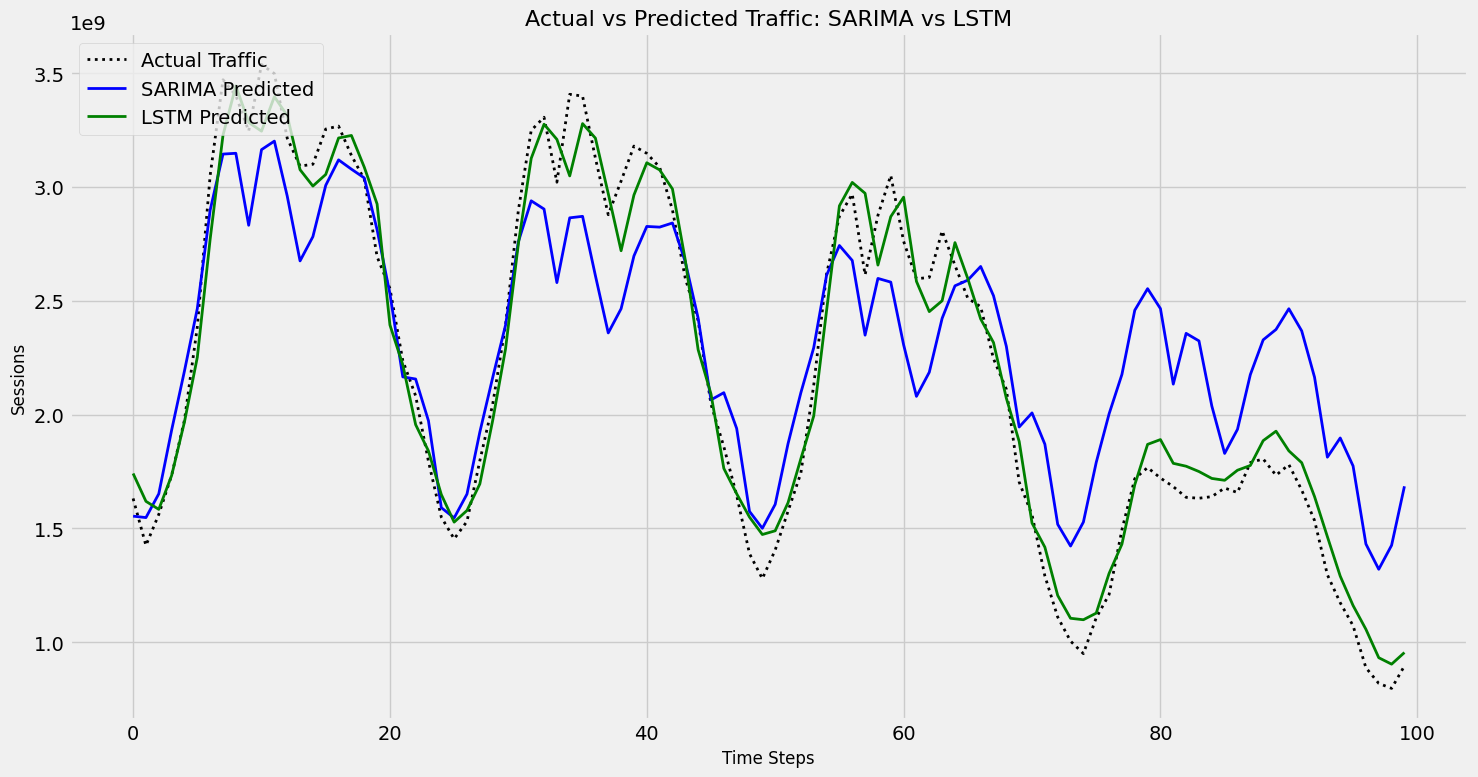

In [41]:
# Step: Improved Visualization
# Purpose: Compare actual and predicted traffic for SARIMA and LSTM.

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))

# Plot actual traffic
plt.plot(y_test.values[:100], label='Actual Traffic', color='black', linestyle='dotted', linewidth=2)

# Plot SARIMA predictions
plt.plot(range(len(sarima_forecast[:100])), sarima_forecast[:100], label='SARIMA Predicted', color='blue', linewidth=2)

# Plot LSTM predictions
plt.plot(range(len(lstm_forecast[:100])), lstm_forecast[:100], label='LSTM Predicted', color='green', linewidth=2)

# Add labels, title, and legend
plt.title("Actual vs Predicted Traffic: SARIMA vs LSTM", fontsize=16)
plt.xlabel("Time Steps", fontsize=12)
plt.ylabel("Sessions", fontsize=12)
plt.legend(loc="upper left")
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [42]:
#Highlight Significant Anomalies

In [43]:
# Define threshold for anomalies (e.g., 2 standard deviations)
threshold_upper = webtraffic_data['Rolling_Mean'] + 2 * webtraffic_data['Rolling_Std']
threshold_lower = webtraffic_data['Rolling_Mean'] - 2 * webtraffic_data['Rolling_Std']

# Create the Anomaly column
webtraffic_data['Anomaly'] = ((webtraffic_data['Sessions'] > threshold_upper) |
                              (webtraffic_data['Sessions'] < threshold_lower)).astype(int)

# Verify if the column is created
print("Anomaly column added successfully. Here's the count of anomalies:")
print(webtraffic_data['Anomaly'].value_counts())

Anomaly column added successfully. Here's the count of anomalies:
Anomaly
0    4744
1     152
Name: count, dtype: int64


In [44]:
# Recompute rolling mean and standard deviation
webtraffic_data['Rolling_Mean'] = webtraffic_data['Sessions'].rolling(window=24).mean()  # 24-hour window
webtraffic_data['Rolling_Std'] = webtraffic_data['Sessions'].rolling(window=24).std()

# Fill NaN values caused by rolling computations
webtraffic_data.fillna(method='bfill', inplace=True)

<ipython-input-44-48db11d9392a>:6: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



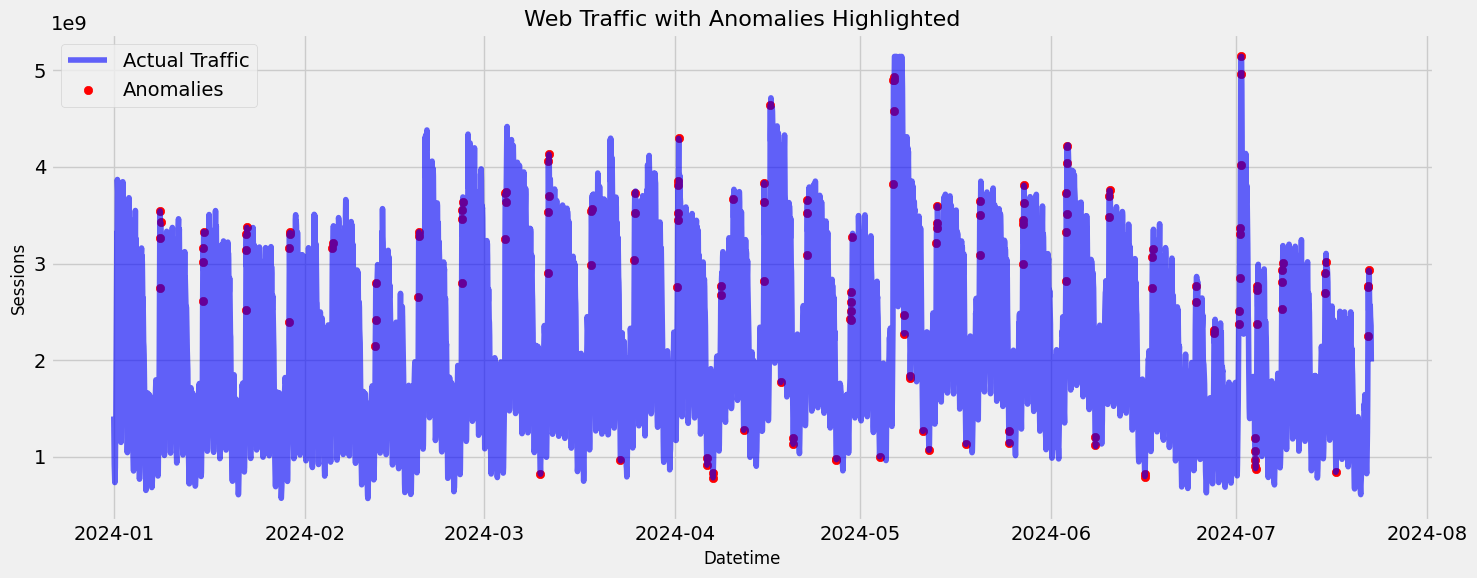

In [45]:
# Visualize anomalies on the traffic trend
plt.figure(figsize=(15, 6))

# Plot actual traffic
plt.plot(webtraffic_data['Datetime'], webtraffic_data['Sessions'], label='Actual Traffic', color='blue', alpha=0.6)

# Highlight anomalies
plt.scatter(webtraffic_data['Datetime'][webtraffic_data['Anomaly'] == 1],
            webtraffic_data['Sessions'][webtraffic_data['Anomaly'] == 1],
            color='red', label='Anomalies')

# Add labels, title, and legend
plt.title("Web Traffic with Anomalies Highlighted", fontsize=16)
plt.xlabel("Datetime", fontsize=12)
plt.ylabel("Sessions", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [46]:
#The plot successfully visualizes the web traffic with anomalies highlighted (red dots). It demonstrates that the anomaly detection is working as intended.
#Identifying points where the traffic significantly deviates from the expected range based on the rolling mean and standard deviation.

Anomalies by Date (Top 10):
Datetime
2024-07-04    8
2024-07-01    8
2024-04-01    6
2024-06-03    6
2024-04-29    6
2024-05-06    5
2024-05-27    5
2024-03-11    5
2024-01-15    4
2024-01-22    4
Name: count, dtype: int64

Anomalies by Day of the Week (0=Monday):
DayOfWeek
0    113
1      1
2      4
3     13
4      1
5     14
6      6
Name: count, dtype: int64


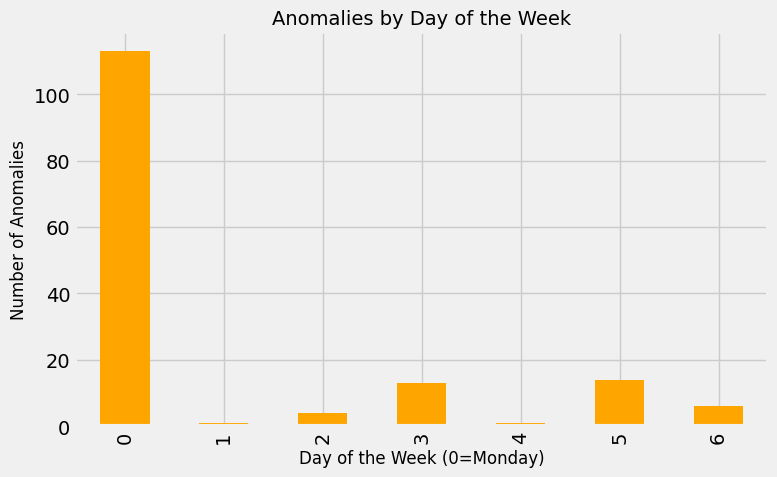

In [47]:
# Anomaly Frequency Analysis
anomaly_counts = webtraffic_data[webtraffic_data['Anomaly'] == 1]['Datetime'].dt.date.value_counts()
print("Anomalies by Date (Top 10):")
print(anomaly_counts.head(10))

# Analyze Anomalies Across Days of the Week
anomalies_by_day = webtraffic_data[webtraffic_data['Anomaly'] == 1]['DayOfWeek'].value_counts().sort_index()
print("\nAnomalies by Day of the Week (0=Monday):")
print(anomalies_by_day)

# Visualize Anomalies by Day of the Week
plt.figure(figsize=(8, 5))
anomalies_by_day.plot(kind='bar', color='orange')
plt.title("Anomalies by Day of the Week", fontsize=14)
plt.xlabel("Day of the Week (0=Monday)", fontsize=12)
plt.ylabel("Number of Anomalies", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

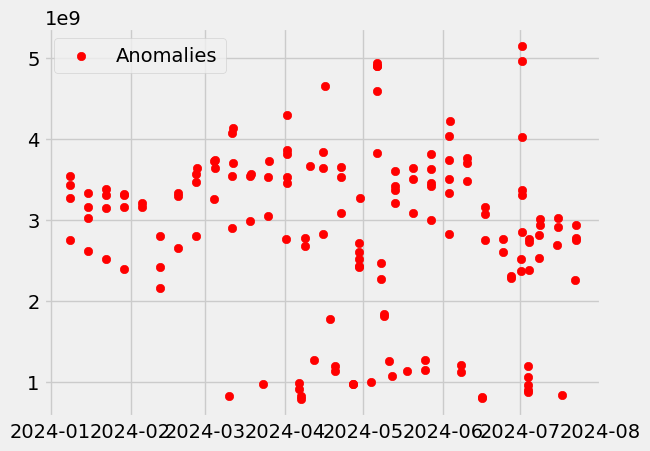

In [48]:
plt.scatter(webtraffic_data['Datetime'][webtraffic_data['Anomaly'] == 1],
            webtraffic_data['Sessions'][webtraffic_data['Anomaly'] == 1],
            color='red', label='Anomalies')
plt.legend()

In [49]:
print(webtraffic_data.columns)
print(webtraffic_data.head())

Index(['Datetime', 'Sessions', 'Date', 'Week', 'Hour', 'Month', 'Rolling_Mean',
       'Rolling_Std', 'Day', 'DayOfWeek', 'IsWeekend', 'Rolling_6H_Mean',
       'Rolling_24H_Mean', 'Rolling_7D_Mean', 'Lag_1H', 'Lag_24H', 'Lag_7D',
       'Anomaly'],
      dtype='object')
             Datetime    Sessions        Date  Week  Hour  Month  \
0 2024-01-01 00:00:00  1418159421  2024-01-01     1     0      1   
1 2024-01-01 01:00:00  1113769116  2024-01-01     1     1      1   
2 2024-01-01 02:00:00   919158921  2024-01-01     1     2      1   
3 2024-01-01 03:00:00   822352824  2024-01-01     1     3      1   
4 2024-01-01 04:00:00   735526737  2024-01-01     1     4      1   

   Rolling_Mean   Rolling_Std  Day  DayOfWeek  IsWeekend  Rolling_6H_Mean  \
0  2.432877e+09  1.202581e+09    1          0          0      967894636.5   
1  2.432877e+09  1.202581e+09    1          0          0      967894636.5   
2  2.432877e+09  1.202581e+09    1          0          0      967894636.5   
3  2.432877

In [50]:
#Build an Interactive Dashboard

In [51]:
# Since 'Hour Index' is not present, skip its creation and proceed with the existing 'Datetime' column
print("Dataset already has a 'Datetime' column in the correct format.")

# Ensure the 'Datetime' column is of datetime type
webtraffic_data['Datetime'] = pd.to_datetime(webtraffic_data['Datetime'])

# Reorganize the columns if necessary (optional, for better readability)
webtraffic_data = webtraffic_data[['Datetime', 'Sessions'] + [col for col in webtraffic_data.columns if col not in ['Datetime', 'Sessions']]]

# Display the updated DataFrame
print("\nUpdated DataFrame:")
print(webtraffic_data.head())

Dataset already has a 'Datetime' column in the correct format.

Updated DataFrame:
             Datetime    Sessions        Date  Week  Hour  Month  \
0 2024-01-01 00:00:00  1418159421  2024-01-01     1     0      1   
1 2024-01-01 01:00:00  1113769116  2024-01-01     1     1      1   
2 2024-01-01 02:00:00   919158921  2024-01-01     1     2      1   
3 2024-01-01 03:00:00   822352824  2024-01-01     1     3      1   
4 2024-01-01 04:00:00   735526737  2024-01-01     1     4      1   

   Rolling_Mean   Rolling_Std  Day  DayOfWeek  IsWeekend  Rolling_6H_Mean  \
0  2.432877e+09  1.202581e+09    1          0          0      967894636.5   
1  2.432877e+09  1.202581e+09    1          0          0      967894636.5   
2  2.432877e+09  1.202581e+09    1          0          0      967894636.5   
3  2.432877e+09  1.202581e+09    1          0          0      967894636.5   
4  2.432877e+09  1.202581e+09    1          0          0      967894636.5   

   Rolling_24H_Mean  Rolling_7D_Mean        L

In [52]:
# Verify the Datetime column
print("\nDatetime column data types:")
print(webtraffic_data.dtypes)

# Check for any invalid datetime values
if webtraffic_data['Datetime'].isnull().any():
    print("\nInvalid datetime entries detected. Please check the source data.")
else:
    print("\nDatetime column is valid.")


Datetime column data types:
Datetime            datetime64[ns]
Sessions                     int64
Date                        object
Week                        UInt32
Hour                         int32
Month                        int32
Rolling_Mean               float64
Rolling_Std                float64
Day                          int32
DayOfWeek                    int32
IsWeekend                    int64
Rolling_6H_Mean            float64
Rolling_24H_Mean           float64
Rolling_7D_Mean            float64
Lag_1H                     float64
Lag_24H                    float64
Lag_7D                     float64
Anomaly                      int64
dtype: object

Datetime column is valid.


In [53]:
#Statistical Significance Testing
from scipy.stats import ttest_ind

# Compute residuals for both models
sarima_residuals = y_test.values - sarima_forecast
lstm_residuals = y_test.values - lstm_forecast.flatten()

# Perform a t-test
t_stat, p_value = ttest_ind(sarima_residuals, lstm_residuals)
print("T-Test Results:")
print(f"T-Statistic: {t_stat:.2f}, P-Value: {p_value:.2f}")

if p_value < 0.05:
    print("The performance difference between SARIMA and LSTM is statistically significant.")
else:
    print("The performance difference between SARIMA and LSTM is NOT statistically significant.")

T-Test Results:
T-Statistic: 42.16, P-Value: 0.00
The performance difference between SARIMA and LSTM is statistically significant.


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

<ipython-input-54-e49bb56498be>:8: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step
             Datetime  SARIMA_Predicted  LSTM_Predicted
0 2024-07-23 00:00:00      1.553989e+09    1.740492e+09
1 2024-07-23 01:00:00      1.547706e+09    1.613949e+09
2 2024-07-23 02:00:00      1.652324e+09    1.582734e+09
3 2024-07-23 03:00:00      1.931903e+09    1.770412e+09
4 2024-07-23 04:00:00      2.192155e+09    2.042278e+09


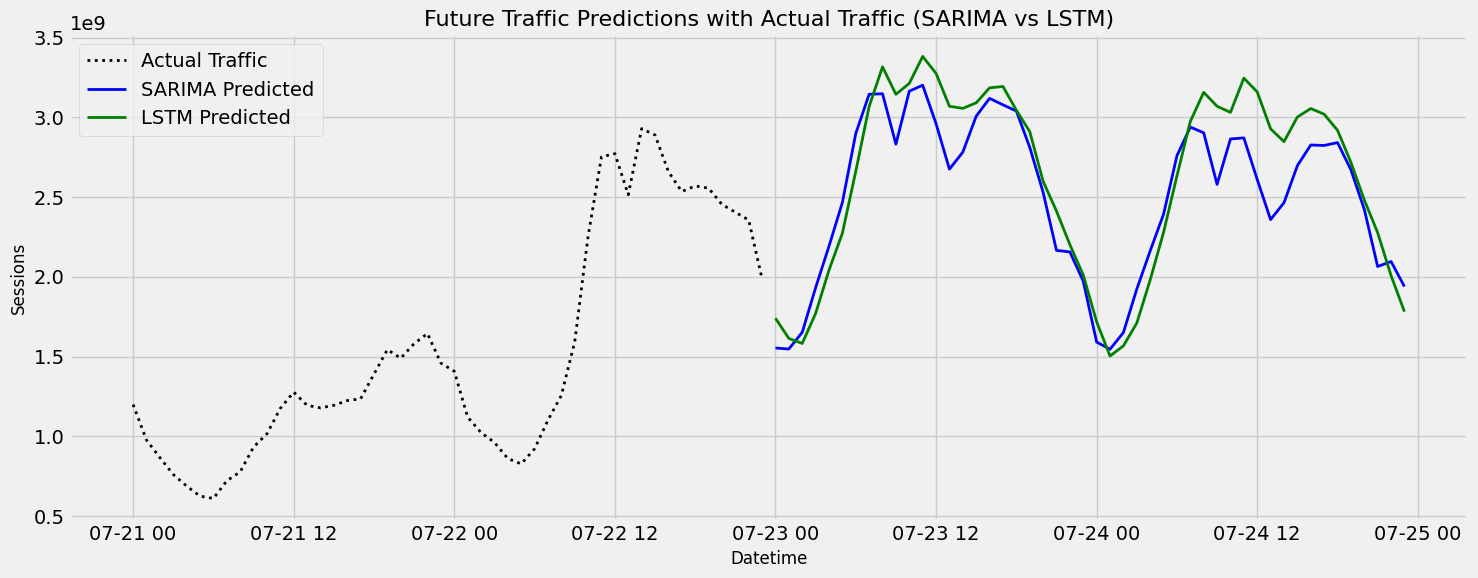

In [54]:
import pandas as pd

# Define future_periods based on the desired number of predictions
future_periods = 48  # Example: Predict for the next 48 hours

# Generate future datetime values starting from the last datetime in the dataset
last_datetime = webtraffic_data['Datetime'].iloc[-1]
future_datetimes = pd.date_range(start=last_datetime, periods=future_periods + 1, freq='H')[1:]

# Ensure SARIMA and LSTM predictions are generated
# Replace these arrays with the actual predictions from your models
sarima_predictions = sarima_model.predict(n_periods=future_periods)
lstm_predictions = lstm_model.predict(X_test_lstm[:future_periods])
lstm_predictions = scaler_y.inverse_transform(lstm_predictions)  # Inverse scaling for LSTM predictions

# Create the future_predictions DataFrame
future_predictions = pd.DataFrame({
    'Datetime': future_datetimes,
    'SARIMA_Predicted': sarima_predictions,
    'LSTM_Predicted': lstm_predictions.flatten()
})

# Display future_predictions to verify
print(future_predictions.head())

# Proceed with the plotting code
import matplotlib.pyplot as plt

# Define the time range for actual test data
actual_dates = webtraffic_data['Datetime'].iloc[-future_periods:]  # Align with last observed data

# Plot future predictions with actual data
plt.figure(figsize=(15, 6))

# Plot actual traffic
plt.plot(actual_dates, y_test.values[-future_periods:], label='Actual Traffic', color='black', linestyle='dotted', linewidth=2)

# Plot SARIMA predictions
plt.plot(future_predictions['Datetime'], future_predictions['SARIMA_Predicted'], label='SARIMA Predicted', color='blue', linewidth=2)

# Plot LSTM predictions
plt.plot(future_predictions['Datetime'], future_predictions['LSTM_Predicted'], label='LSTM Predicted', color='green', linewidth=2)

# Add labels, title, and legend
plt.title("Future Traffic Predictions with Actual Traffic (SARIMA vs LSTM)", fontsize=16)
plt.xlabel("Datetime", fontsize=12)
plt.ylabel("Sessions", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [55]:
import warnings
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Suppress FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)

# Compute metrics for SARIMA
mae_sarima_future = mean_absolute_error(y_test.values[-future_periods:], future_predictions['SARIMA_Predicted'])
rmse_sarima_future = mean_squared_error(y_test.values[-future_periods:], future_predictions['SARIMA_Predicted'], squared=False)

# Compute metrics for LSTM
mae_lstm_future = mean_absolute_error(y_test.values[-future_periods:], future_predictions['LSTM_Predicted'])
rmse_lstm_future = mean_squared_error(y_test.values[-future_periods:], future_predictions['LSTM_Predicted'], squared=False)

# Print results
print("Future Prediction Metrics:")
print(f"SARIMA - MAE: {mae_sarima_future:.2f}, RMSE: {rmse_sarima_future:.2f}")
print(f"LSTM - MAE: {mae_lstm_future:.2f}, RMSE: {rmse_lstm_future:.2f}")

Future Prediction Metrics:
SARIMA - MAE: 1038700036.23, RMSE: 1278503081.25
LSTM - MAE: 1103536426.08, RMSE: 1335014874.24


<Figure size 1000x600 with 0 Axes>

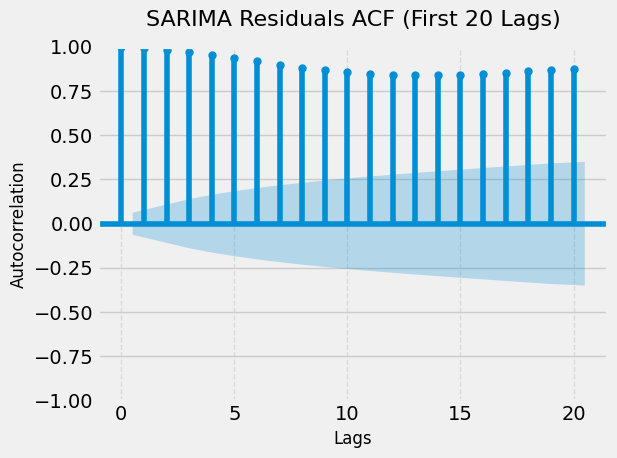

In [56]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

# Assuming `sarima_residuals` contains the residuals from your SARIMA model
plt.figure(figsize=(10, 6))  # Larger plot for better readability
plot_acf(sarima_residuals, lags=20, alpha=0.05, zero=True)  # Focus on the first 20 lags
plt.title("SARIMA Residuals ACF (First 20 Lags)", fontsize=16, pad=15)
plt.xlabel("Lags", fontsize=12)
plt.ylabel("Autocorrelation", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)  # Add vertical grid lines
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

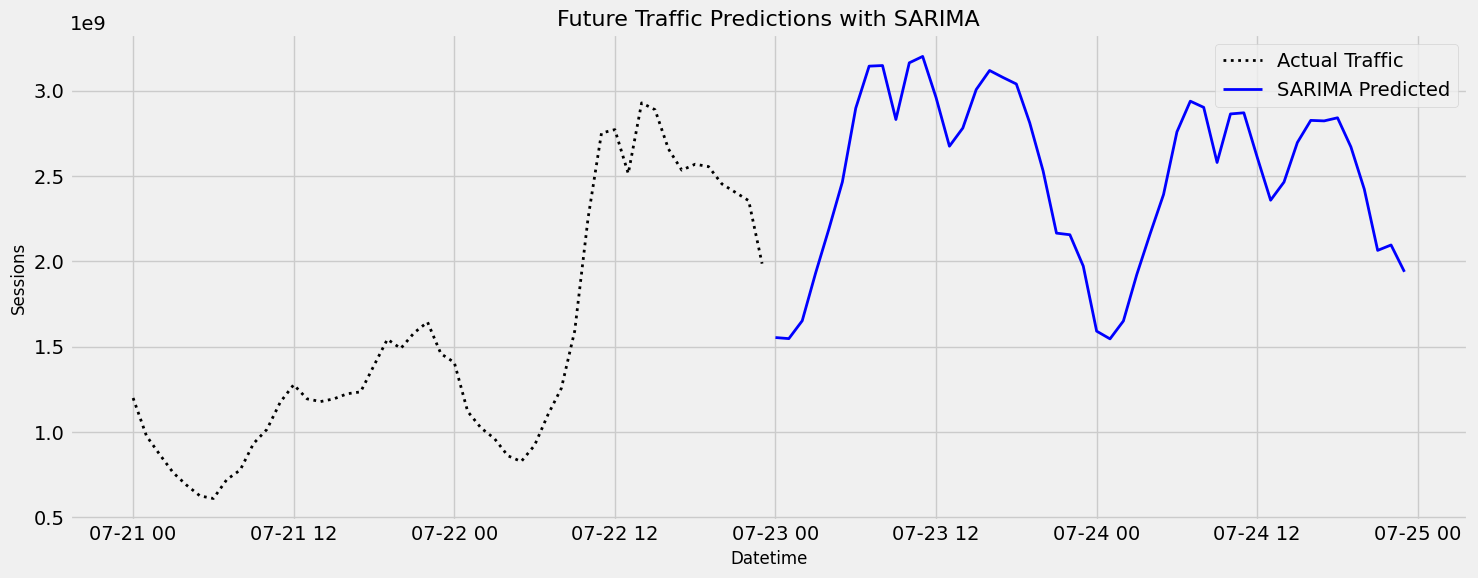

In [57]:
import matplotlib.pyplot as plt
import pandas as pd

# Generate a proper datetime range for the predictions
last_actual_datetime = webtraffic_data['Datetime'].iloc[-1]
future_datetimes = pd.date_range(start=last_actual_datetime, periods=future_periods + 1, freq='H')[1:]

# Replace future_predictions['Datetime'] with the corrected future range
future_predictions['Datetime'] = future_datetimes

# Plot actual traffic and SARIMA predictions
plt.figure(figsize=(15, 6))

# Plot actual traffic
plt.plot(webtraffic_data['Datetime'].iloc[-future_periods:],
         y_test.values[-future_periods:],
         label='Actual Traffic', color='black', linestyle='dotted', linewidth=2)

# Plot SARIMA predictions
plt.plot(future_predictions['Datetime'],
         future_predictions['SARIMA_Predicted'],
         label='SARIMA Predicted', color='blue', linewidth=2)

# Add labels, title, and legend
plt.title("Future Traffic Predictions with SARIMA", fontsize=16)
plt.xlabel("Datetime", fontsize=12)
plt.ylabel("Sessions", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [58]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.4/320.4 kB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 99.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 6.2 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [59]:
import gradio as gr
import matplotlib.pyplot as plt
import pandas as pd

# Function to plot actual vs. predicted traffic
def plot_predictions():
    # Generate a plot for SARIMA and LSTM predictions
    plt.figure(figsize=(15, 6))

    # Plot actual traffic
    plt.plot(webtraffic_data['Datetime'].iloc[-future_periods:],
             y_test.values[-future_periods:],
             label='Actual Traffic', color='black', linestyle='dotted', linewidth=2)

    # Plot SARIMA predictions
    plt.plot(future_predictions['Datetime'],
             future_predictions['SARIMA_Predicted'],
             label='SARIMA Predicted', color='blue', linewidth=2)

    # Plot LSTM predictions
    plt.plot(future_predictions['Datetime'],
             future_predictions['LSTM_Predicted'],
             label='LSTM Predicted', color='green', linewidth=2)

    # Add labels, title, and legend
    plt.title("Future Traffic Predictions: SARIMA vs LSTM", fontsize=16)
    plt.xlabel("Datetime", fontsize=12)
    plt.ylabel("Sessions", fontsize=12)
    plt.legend(loc="upper left")
    plt.grid(True)
    plt.tight_layout()

    # Save the plot to a file
    plt.savefig("/content/predictions_plot.png")
    plt.close()
    return "/content/predictions_plot.png"

# Function to display prediction metrics
def display_metrics():
    metrics = {
        "Model": ["SARIMA", "LSTM"],
        "Mean Absolute Error (MAE)": [mae_sarima_future, mae_lstm_future],
        "Root Mean Squared Error (RMSE)": [rmse_sarima_future, rmse_lstm_future]
    }
    return pd.DataFrame(metrics)

# Gradio function to display the dashboard
def gradio_dashboard():
    # Get the plot
    plot_path = plot_predictions()

    # Get metrics
    metrics_df = display_metrics()

    # Display the image and metrics
    return plot_path, metrics_df.to_string()

# Gradio interface
with gr.Blocks() as dashboard:
    gr.Markdown("## Web Traffic Prediction Dashboard")
    gr.Markdown("This dashboard compares predictions from SARIMA and LSTM models.")

    # Show the plot
    plot_output = gr.Image(label="Prediction Plot")

    # Display metrics
    metrics_output = gr.Textbox(label="Prediction Metrics", lines=15)

    # Define the Gradio button and actions
    with gr.Row():
        gr.Button("Update Dashboard").click(gradio_dashboard, outputs=[plot_output, metrics_output])

# Launch the dashboard
dashboard.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://6690a19ebdbb5fa3fc.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [60]:
import gradio as gr
import matplotlib.pyplot as plt
import pandas as pd

# Function to generate plot based on the selected model
def generate_plot(model):
    """Generate plot based on the selected model."""
    plt.figure(figsize=(15, 6))
    actual_dates = webtraffic_data['Datetime'].iloc[-future_periods:]
    plt.plot(actual_dates, y_test.values[-future_periods:], label='Actual Traffic', color='black', linestyle='dotted', linewidth=2)

    if model == "SARIMA":
        plt.plot(future_predictions['Datetime'], future_predictions['SARIMA_Predicted'], label='SARIMA Predicted', color='blue', linewidth=2)
    elif model == "LSTM":
        plt.plot(future_predictions['Datetime'], future_predictions['LSTM_Predicted'], label='LSTM Predicted', color='green', linewidth=2)

    plt.title(f"{model} Predictions vs Actual Traffic", fontsize=16)
    plt.xlabel("Datetime", fontsize=12)
    plt.ylabel("Sessions", fontsize=12)
    plt.legend(loc="upper left")
    plt.grid(True)
    plt.tight_layout()
    plot_path = f"/content/{model.lower()}_plot.png"
    plt.savefig(plot_path)
    plt.close()
    return plot_path

# Function to display metrics for both models
def display_metrics():
    """Generate a DataFrame with metrics for SARIMA and LSTM."""
    metrics = {
        "Model": ["SARIMA", "LSTM"],
        "Mean Absolute Error (MAE)": [mae_sarima_future, mae_lstm_future],
        "Root Mean Squared Error (RMSE)": [rmse_sarima_future, rmse_lstm_future]
    }
    return pd.DataFrame(metrics)

# Gradio interface function
def dashboard_interface(model="SARIMA"):
    """Generate plot and metrics for the selected model."""
    plot_path = generate_plot(model)  # Generate plot for the selected model
    metrics_df = display_metrics()   # Get metrics
    return plot_path, metrics_df.to_string()

# Build the Gradio interface
with gr.Blocks() as dashboard:
    gr.Markdown("## Interactive Web Traffic Prediction Dashboard")
    gr.Markdown("Use the dropdown menu to select a model and view its predictions vs actual traffic along with performance metrics.")

    # Dropdown for model selection
    model_selection = gr.Dropdown(["SARIMA", "LSTM"], label="Select Model", value="SARIMA")

    # Outputs: Plot and Metrics
    plot_output = gr.Image(label="Prediction Plot")
    metrics_output = gr.Textbox(label="Metrics", lines=15)

    # Button to update dashboard
    gr.Button("Update Dashboard").click(
        fn=dashboard_interface,        # Function to call
        inputs=[model_selection],      # Inputs to the function
        outputs=[plot_output, metrics_output]  # Outputs from the function
    )

# Launch the Gradio dashboard
dashboard.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://1883fbb0874bd4e2b0.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [61]:
import gradio as gr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Function to generate plot based on the selected model and user input
def generate_custom_prediction(model, future_hours):
    future_hours = int(future_hours)  # Convert input to integer
    future_datetimes = pd.date_range(start=webtraffic_data['Datetime'].iloc[-1], periods=future_hours + 1, freq='H')[1:]

    # Generate predictions based on the selected model
    if model == "SARIMA":
        sarima_predictions = sarima_model.predict(n_periods=future_hours)
        plt.figure(figsize=(15, 6))
        plt.plot(webtraffic_data['Datetime'], webtraffic_data['Sessions'], label="Actual Data", color="blue")
        plt.plot(future_datetimes, sarima_predictions, label="SARIMA Predictions", color="green")
    elif model == "LSTM":
        lstm_input = X_test_lstm[-future_hours:]  # Use the most recent LSTM data
        lstm_predictions = lstm_model.predict(lstm_input)
        lstm_predictions = scaler_y.inverse_transform(lstm_predictions)  # Inverse scale predictions
        plt.figure(figsize=(15, 6))
        plt.plot(webtraffic_data['Datetime'], webtraffic_data['Sessions'], label="Actual Data", color="blue")
        plt.plot(future_datetimes, lstm_predictions.flatten(), label="LSTM Predictions", color="green")

    # Customize the plot
    plt.title(f"{model} Web Traffic Predictions", fontsize=16)
    plt.xlabel("Datetime", fontsize=12)
    plt.ylabel("Sessions", fontsize=12)
    plt.legend(loc="upper left")
    plt.grid(True)
    plt.tight_layout()

    # Save and return the plot path
    plot_path = f"/content/{model.lower()}_prediction_plot.png"
    plt.savefig(plot_path)
    plt.close()
    return plot_path

# Gradio interface function
def prediction_dashboard(model="SARIMA", future_hours=24):
    """Generate future predictions based on user inputs."""
    plot_path = generate_custom_prediction(model, future_hours)  # Generate predictions
    return plot_path

# Build the Gradio interface
with gr.Blocks() as dashboard:
    gr.Markdown("## Interactive Web Traffic Prediction Dashboard")
    gr.Markdown("Input the number of hours to predict and select a model for future web traffic forecasting.")

    # Dropdown for model selection
    model_selection = gr.Dropdown(["SARIMA", "LSTM"], label="Select Model", value="SARIMA")

    # Input for future hours
    future_hours_input = gr.Number(label="Future Hours to Predict", value=24)

    # Output: Plot
    plot_output = gr.Image(label="Prediction Plot")

    # Button to generate predictions
    gr.Button("Generate Prediction").click(
        fn=prediction_dashboard,
        inputs=[model_selection, future_hours_input],
        outputs=[plot_output]
    )

# Launch the Gradio dashboard
dashboard.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://5092f10099a3580ede.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [62]:
#Short-term predictions: Start with a smaller horizon (e.g., 24–48 hours) to verify how predictions align with recent trends.

In [63]:
!pip install pmdarima

In [64]:
# Generate predictions for the next week (168 hours)
future_periods = 24 * 7  # 7 days of hourly data
future_forecast = sarima_model.predict(n_periods=future_periods)

# Generate future datetime values
last_datetime = webtraffic_data['Datetime'].iloc[-1]
future_dates = pd.date_range(start=last_datetime + pd.Timedelta(hours=1), periods=future_periods, freq='H')

# Combine predictions into a DataFrame
next_week_forecast = pd.DataFrame({'Datetime': future_dates, 'SARIMA_Predicted': future_forecast})

# Plot predictions
def plot_next_week_predictions():
    plt.figure(figsize=(15, 6))

    # Plot actual data for the last week
    plt.plot(webtraffic_data['Datetime'][-168:], webtraffic_data['Sessions'][-168:], label='Actual Data (Last Week)', color='blue')

    # Plot SARIMA predictions
    plt.plot(next_week_forecast['Datetime'], next_week_forecast['SARIMA_Predicted'], label='SARIMA Predictions (Next Week)', color='green')

    # Customize the plot
    plt.title('Web Traffic Predictions for the Next Week (SARIMA)', fontsize=16)
    plt.xlabel('Datetime', fontsize=12)
    plt.ylabel('Sessions', fontsize=12)
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.tight_layout()

    # Save the plot
    plt.savefig('/content/next_week_predictions.png')
    plt.close()
    return '/content/next_week_predictions.png'

# Gradio interface for next week's predictions
import gradio as gr

def gradio_next_week():
    plot_path = plot_next_week_predictions()
    return plot_path

# Gradio dashboard
with gr.Blocks() as next_week_dashboard:
    gr.Markdown("## SARIMA Next Week Web Traffic Predictions")
    gr.Markdown("This dashboard shows SARIMA model predictions for the upcoming week.")

    # Show plot
    plot_output = gr.Image(label="Next Week Predictions")

    # Button to refresh the plot
    gr.Button("Generate Next Week Predictions").click(gradio_next_week, outputs=plot_output)

# Launch the dashboard
next_week_dashboard.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://5727b2354a991e6d07.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [65]:
##Interpretation:
#MAE and RMSE: Both values are in the range of 1 billion sessions. While these are large numbers, they should be interpreted relative to the scale of your data. If your session values are also in the billions, this might be acceptable.

#RMSE > MAE indicates that larger errors are contributing disproportionately to the overall error, meaning there are significant outliers in your predictions.
#MAPE (102.23%):

#This result suggests that the SARIMA model predictions are, on average, off by over 100% when compared to actual values.
#A MAPE value above 50% is generally considered poor. Values above 100% indicate that the model is likely not capturing the data trend or seasonality effectively.
